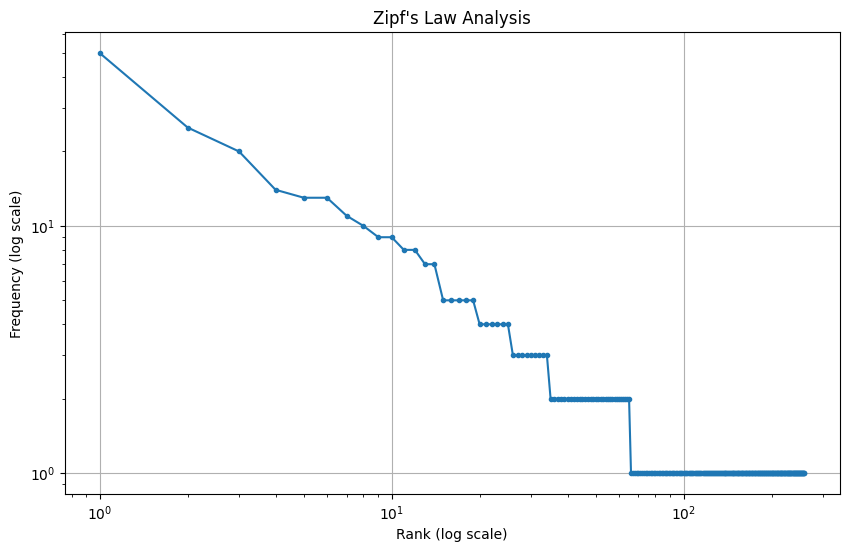

In [36]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import pandas as pd


text = """
The all-new BMW M340i went on sale in India in March this year and it's the latest addition to the 3 Series line-up. The performance-oriented BMW M340i sits right at the top in the 3 Series range and rivals the likes of the Mercedes-AMG A 35 4 Matic and the Audi S5. BMW is manufacturing the BMW M340i locally in India and the company will be selling it in limited numbers in our market. If you are planning to buy the new BMW M340i, here are few pros and cons you should have a look at.

Most Powerful 3 Series: It's the fastest and most powerful 3 Series money can buy. It features a 3.0-litre, six-cylinder engine under the hood that belts out 387 bhp and a solid 500 Nm of peak torque. The powertrain provides enough grunt to the M340i for it to do the 0-100 kmph sprint in just 4.4 seconds making it seriously quick for its segment.
All-Wheel-Drive: Yes! The eight-speed automatic transmission in the BMW M340i sends power to all the four wheels. And yes! It also gets paddle shifters.
The ride quality is stiff but complements the performance well. The M340i also sits lower by 10 mm over the standard 3

MSport Features: The BMW M340i also gets a new lift-related damper control and has the M Sport differential that is electronically controlled. The Adaptive M suspension with electronically controlled dampers offers a good mix of ride and handling.
The cabin of the BMW M340i could have given a sportier treatment.

Feature Loaded Cabin: The cabin of the new BMW M340i gets all the bells and whistles seen on the standard 3 Series sedan and then some. From the sunroof to the 12.3-inch instrument panel- and even the large 10.25-inch touchscreen with connectivity tech- all are standard.
Looks Sharp And Sporty: The new kidney grille with chrome bezels, sharp and sleek headlights, and the muscular bumper, all add to its sporty and aggressive demeanour. In India the car rides on 18-inch wheels that are standard while can be upgraded to 19-inch units which are optional.
Expensive Proposition: At an ex-showroom price of 62.90 lakh, the BMW M340i won't be easy on your pocket. In fact, ex-showroom price for the BMW 5 Series starts at Rs. 56.00 lakh.
Ground Clearance: Low ground clearance has always been a concern for drivers in India and we often fear about scraping the belly of our cars. Compared to the regular 3 Series, the M340i sits lower by about 10 mm.
The BMW M340i will be locally-assembled in India.

Cabin Looks Similar To 3 Series: On the inside, the BMW M340i doesn't feel too special and looks quite like the standard 3 Series, save for the those Alcantara upholstery. Attributes like red inserts and dual-red stitching along with flat bottom steering wheel added bolstering or side support in the seats would have added to its sporty character.

"""

words = nltk.word_tokenize(text)

text = text.strip()
text = text.lower()
tokens = word_tokenize(text)
# tokens = [text for text in tokens if text not in stopwords.words('english')]
# tokens = [text for text in tokens if text not in string.punctuation]
total_words = len(tokens)

word_freq = Counter(tokens)

ranked_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)


ranks = list(range(1, len(ranked_words) + 1))
frequencies = [item[1] for item in ranked_words]
probabilities = [item[1] / total_words for item in ranked_words]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title("Zipf's Law Analysis")
plt.grid(True)
plt.show()

In [30]:
dict(ranked_words)
ranks = list(ranks)

In [41]:
df = pd.DataFrame.from_dict(ranked_words)
df['ranks'] = ranks
df['probabilities'] = probabilities
df['Pr*R'] = df['ranks'] * df['probabilities']
df = df.rename(columns={0: "Words"})
df = df.rename(columns={1: "freq"})
df

,Words,freq,ranks,probabilities,Pr*R
0,the,50,1,0.093284,0.093284
1,.,25,2,0.046642,0.093284
2,and,20,3,0.037313,0.111940
3,m340i,14,4,0.026119,0.104478
4,bmw,13,5,0.024254,0.121269
...,...,...,...,...,...
254,side,1,255,0.001866,0.475746
255,support,1,256,0.001866,0.477612
256,seats,1,257,0.001866,0.479478
257,would,1,258,0.001866,0.481343
